**Discrete Fourier Series Examples Notebook**

N. Stergioulas

Aristotle University of Thessaloniki

v1.0 (April 2020)

###### Content provided under a Creative Commons Attribution license, [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/); code under [GNU GPLv3 License](https://choosealicense.com/licenses/gpl-3.0/). (c)2020 [Nikolaos Stergioulas](http://www.astro.auth.gr/~niksterg/)



In [1]:
import numpy as np
from scipy import fftpack 
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 18
mpl.rc('xtick', labelsize=16) ; mpl.rc('ytick', labelsize=16) 
plt.rcParams['figure.figsize']=8,5 ; plt.rcParams['legend.fontsize']=16

### From CFT to DFT
The continuous Fourier transform of a continuous function $h(t)$ is
$$\tilde h(f)=\int_{-\infty}^{\infty} h(t) e^{-i 2 \pi f t} d t$$
Consider now the set of $N+1$ discrete data points with values $h_n$ ($n=-N/2,..,N/2$, with $N$ being even), sampled at equally-spaced times $t_n = n\,\Delta t$. The corresponding sampling rate is $1/\Delta t$ and the sampling times range from $t_{-N/2} = -(N/2)\Delta t$ to $t_{N/2} = (N/2)\Delta t$. 

Assume also that this set is *periodic*, with period $T=N\Delta t$, so that the values of the first and the last samples coincide, $h_{N/2} = h_{-N/2}$. There are thus only $N$ independent samples $h_{-N/2},..,h_{N/2-1}$. These $N$ independent samples determine at most $N$ independent transform values $H_k$ at the discrete frequencies $f_k = k/T = k/(N\Delta t)$, with $k=-N/2,..,N/2-1$).

Now, evaluate the Fourier transform integral (in the above time interval $-T/2 \leq t \leq. T/2$ only) for discrete frequency values $f_k$, using the discrete samples $h_{-N/2},..,h_{N/2}$ with the trapezoidal rule
$$
\begin{aligned}
\tilde h(f_k) &= \int_{0}^{T} h(t) e^{-i 2 \pi f_k t} d t \\
&=\sum_{n=-N/2}^{N/2-1} \left( h_n e^{-i 2 \pi f_k t_n} + h_{n+1} e^{-i 2 \pi f_k t_{n+1}} \right)  \frac{\Delta t}{2} \\
& = \left(h_{-N/2} e^{-i 2 \pi f_k t_{-N/2}} + 2 h_{-N/2+1} e^{-i 2 \pi f_k t_{-N/2+1}} + ...+ 2 h_{N/2-1} e^{-i 2 \pi f_k t_{N/2-1}} + h_{N} e^{-i 2 \pi f_k t_{N/2}}  \right)   \frac{\Delta t}{2}\\
\end{aligned}
$$
Taking into account that $h_{N-/2} = h_{N/2}$ (because of the periodicity), we obtain
$$
\begin{aligned}
\tilde h(f_k) &= \sum_{n=-N/2}^{N/2-1} h_n e^{-i 2 \pi f_k t_{n}} \Delta t \\
&= \frac{N}{T}\sum_{n=-N/2}^{N/2-1} h_n e^{-i (2 \pi k/N) n}  \\
& = \frac{N}{T} H_k
\end{aligned}
$$
where we define 
$$H_k = \sum_{n=-N/2}^{N/2-1} h_n e^{-i (2 \pi k/N) n}$$
as the *Discrete Fourier Transform* (DFT).

Notice that because both the discrete signal and the DFT are periodic, this cyclical property allows us to relabel the sample points. For example, shifting the signal forward by half a period, we can relabel the samples as $n=0,..,N-1$. Then, the DFT becomes
$$\boxed{H_k = \sum_{n=0}^{N-1} h_n e^{-i (2 \pi k/N) n}}$$
with $k=0,..,N-1$, which is the definition used e.g. in Python or other implementations.

In the examples that follow, we will first label the points as $n=0,..,N-1$, evaluate the DFT and the reorder the transform and the frequencies by shifting them by half a signal period backwards.

### Example 1: Single frequency with finite duration and integer number of cycles

We construct a sinusoidal signal with frequency $f_0$ and a total duration of $T$, fitting precisely $N_{\rm cycles}$ within this duration. In this way, the periodic extension of the discrete signal is precisely a sinusoidal signal with frequency $f_0$ and infinite duration. For such an arrangement, the DFT will have a nonzero magnitude only at that single frequency.

Let's have a look at the continuous signal in this time interval: 

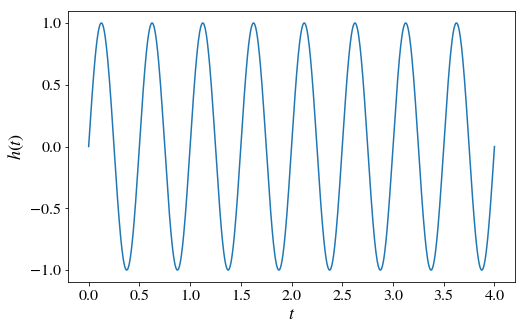

In [31]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8     # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)

t = np.linspace(0, T, 1000)
h = np.sin(2.0*np.pi*f0*t)

plt.plot(t, h)
plt.xlabel(r'$t$') ; plt.ylabel(r'$h(t)$')
plt.show()

We will now sample the signal using $N$ equidistant samples. The minimum number of samples required to obtain the frequency is 4 per cycle.

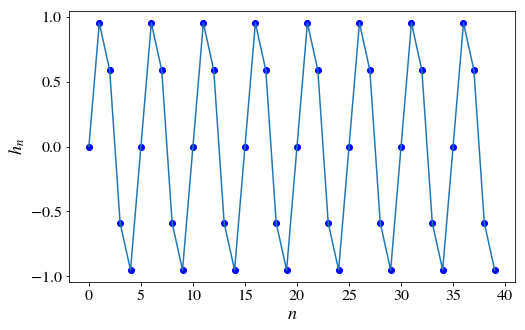

In [32]:
N = 5*Ncycles  # number of samples, must be >= 4*Ncycles, but otherwise does 
               # not need to be integer multiple of Ncycles
    
dt = T/N       # time resolution

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)      # create the signal samples

plt.plot(h_n, 'bo', h_n)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

Next, we evaluate the DFT:

In [5]:
H_k = fftpack.fft(h_n)

The spectrum that we obtain is ordered in the following way: element $n=0$ corresponds to frequency $f=0$, elements $n=1$ to $n=N/2-1$ correspond to the positive frequencies and the remaining elements to the negative frequencies (with $n=N/2$ to the most negative frequency and $n=N-1$ to the least negative frequency. 

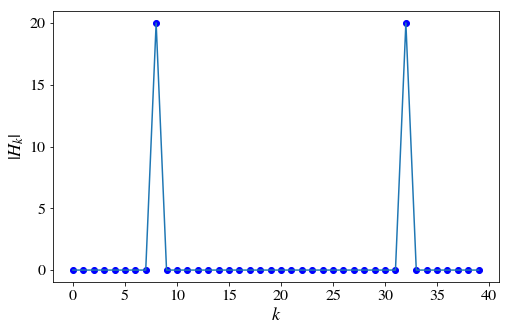

In [6]:
plt.plot(np.abs(H_k), 'bo', np.abs(H_k))
plt.xlabel(r'$k$') ; plt.ylabel(r'$|H_k|$')
plt.show()

However, we wish to display $|H(f_k)|$ as being symmetric around the central element (to which we want to assign the frequency $f=0$). To achieve this, we first have to re-order the elements of the DFT, by shifting them cyclically by half a signal period $T$:

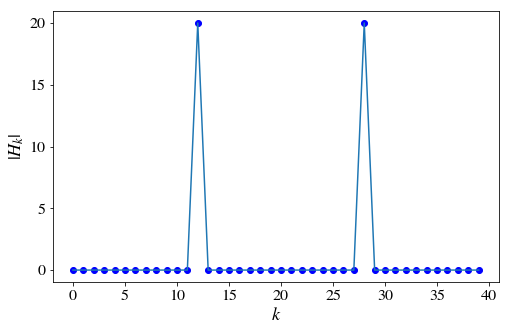

In [7]:
H_k_shift = fftpack.fftshift(H_k)

plt.plot(np.abs(H_k_shift), 'bo', np.abs(H_k_shift))
plt.xlabel(r'$k$') ; plt.ylabel(r'$|H_k|$')
plt.show()

Next, we want to assign frequency values to the index $k$. First, we assign values according to the initial order of the DFT:

In [8]:
f_k = fftpack.fftfreq(h_n.size, d = dt) 

and then we cyclically shift them by half a signal period, so that they correspond to the re-ordered list of elements we created above:

In [9]:
f_shift = fftpack.fftshift(f_k) 

Below, we see a comparison of the frequency values as a function of the index $k$, before and after the re-ordering:

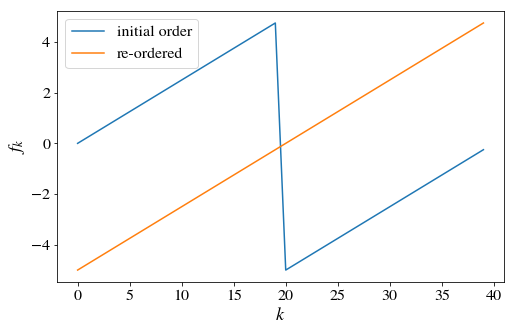

In [10]:
plt.plot(f_k,'-',f_shift)
plt.xlabel(r'$k$') ; plt.ylabel(r'$f_k$')
plt.legend(['initial order', 're-ordered'], loc='best')
plt.show()

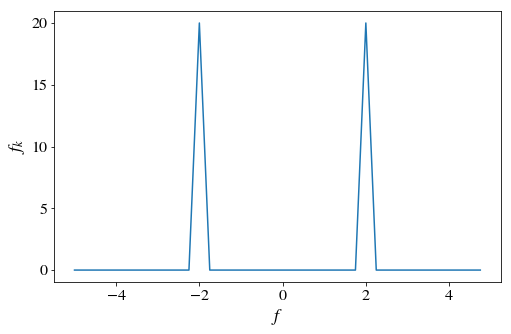

In [11]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.xlabel(r'$f$') ; plt.ylabel(r'$f_k$')
plt.show()

### Example 2: Spectral leakage because of non-integer number of cycles

We construct the same sinusoidal signal as in the previous example, but this time we choose a non-integer number of cycles within the signal period: 

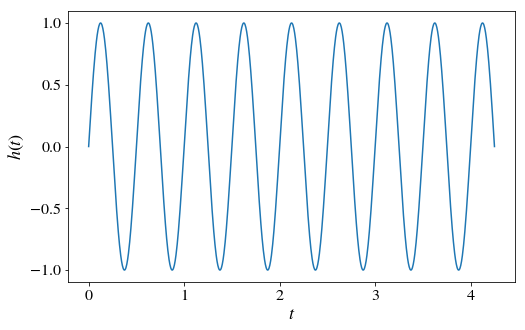

In [140]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8.5   # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)

t = np.linspace(0, T, 1000)
h = np.sin(2.0*np.pi*f0*t)

plt.plot(t, h)
plt.xlabel(r'$t$') ; plt.ylabel(r'$h(t)$')
plt.show()

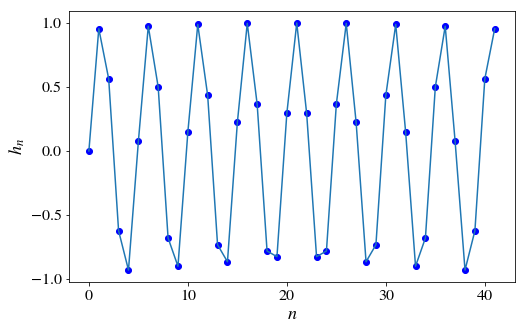

In [141]:
N = int(5*Ncycles)  # number of samples, must be >= 4*Ncycles, but otherwise does 
                    # not need to be integer multiple of Ncycles
    
dt = T/N       # time resolution

t_n = np.linspace(0, (N-1)*dt, N)   # create the time samples
h_n = np.sin(2.0*np.pi*f0*t_n)      # create the signal samples

plt.plot(h_n, 'bo', h_n)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [144]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

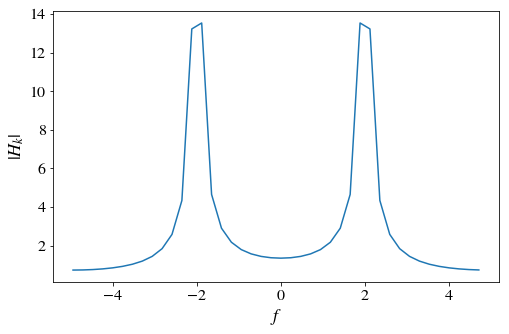

In [145]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
plt.show()

### Example 3: Spectral leakage because of zero-padding

We construct the same sinusoidal signal as in the previous examples, but this time we extend the original time interval with zero-padding.

In [43]:
f0 = 2.0        # frequency of sinusoid
T0 = 1/f0       # period of sinusoid
Ncycles = 8     # number of cycles we choose within signal duration
T = Ncycles*T0  # total duration of the signal (periodicity of the signal)

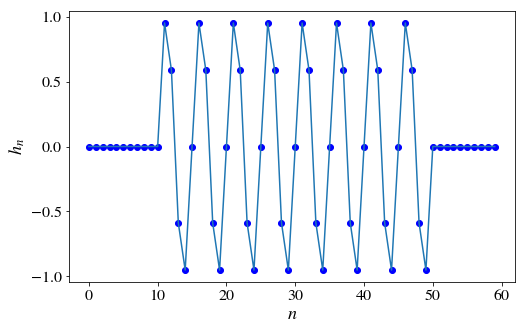

In [71]:
N = 5*Ncycles  # number of samples, must be >= 4*Ncycles, but otherwise does 
               # not need to be integer multiple of Ncycles
    
dt = T/N       # time resolution

n_pad = 10
t_n = np.linspace(0, (N+2*n_pad-1)*dt, N+2*n_pad)   # create the time samples
h_n = np.zeros(N+2*n_pad)

for i in range (n_pad, N+n_pad):
    h_n[i] = np.sin(2.0*np.pi*f0*t_n[i-n_pad])

plt.plot(h_n, 'bo', h_n)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [72]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

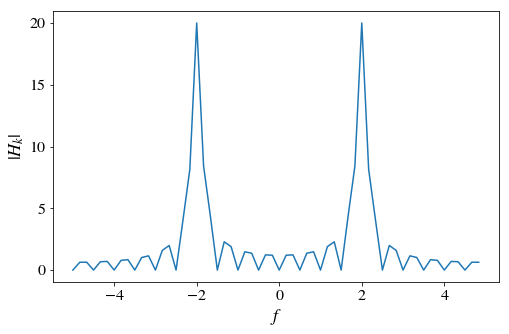

In [73]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
plt.show()

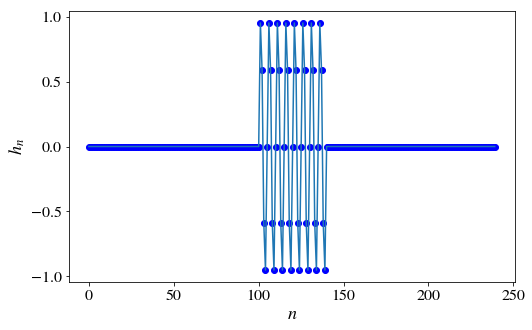

In [113]:
n_pad = 100
t_n = np.linspace(0, (N+2*n_pad-1)*dt, N+2*n_pad)   # create the time samples
h_n = np.zeros(N+2*n_pad)

for i in range (n_pad, N+n_pad):
    h_n[i] = np.sin(2.0*np.pi*f0*t_n[i-n_pad])

plt.plot(h_n, 'bo', h_n)
plt.xlabel(r'$n$') ; plt.ylabel(r'$h_n$')
plt.show()

In [114]:
H_k = fftpack.fft(h_n)
H_k_shift = fftpack.fftshift(H_k)
f_k = fftpack.fftfreq(h_n.size, d = dt) 
f_shift = fftpack.fftshift(f_k) 

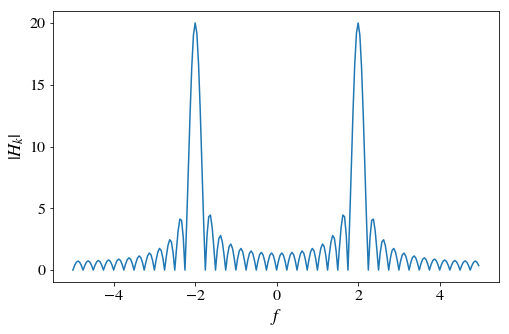

In [116]:
plt.plot(f_shift, np.abs(H_k_shift))
plt.xlabel(r'$f$') ; plt.ylabel(r'$|H_k|$')
#plt.axis([1, 3, None, None])
plt.show()

The resolution of the main frequency improves over the non-integer cycles case without zero-padding, but as padding increases, the spectrum approaches the shape of the CFT when using the rectangular window on this signal, so it will never get better than this, no matter how much zero-padding is added.

### Example 4: Damped single frequency

In [18]:
width = 2.0
freq = 0.5
t = np.linspace(-50, 50, 501) # create linearly space time array 

g = np.zeros(501)

for i in range (200,301):
    g[i] = np.exp(-np.abs(t[i])/width) * np.sin(2.0*np.pi*freq*t[i]) # signal

dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2) # amplitude
phase = np.angle(G) # phase
phase_unwrap = np.unwrap(phase)

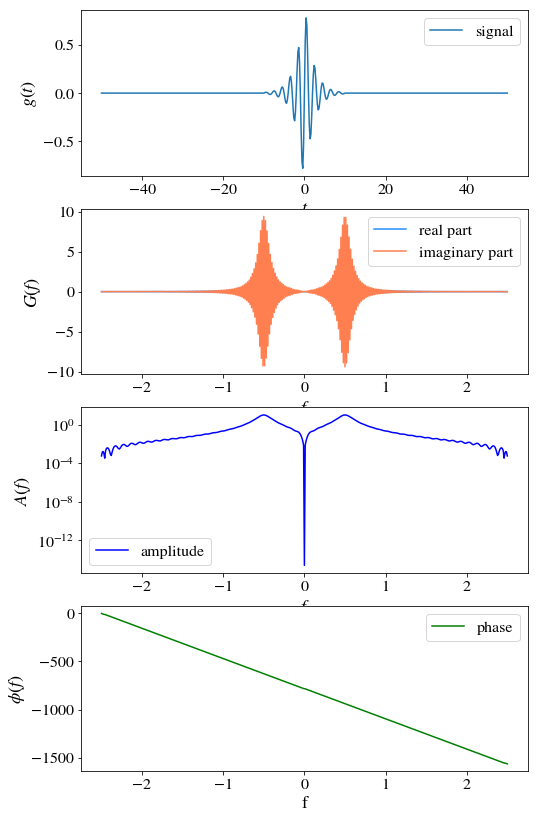

In [19]:
fig = plt.figure(1, figsize=(8,14), frameon=False)
ax1 = fig.add_subplot(411)
ax1.plot(t, g, label='signal')
ax1.legend()
ax1.set_xlabel('$t$')
ax1.set_ylabel('$g(t)$')
ax2 = fig.add_subplot(412)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('$f$')
ax2.set_ylabel('$G(f)$')
ax3 = fig.add_subplot(413)
ax3.plot(f, A, color='blue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.legend()
ax3.set_xlabel('$f$')
ax3.set_ylabel('$A(f)$')
ax3 = fig.add_subplot(414)
ax3.plot(f, phase_unwrap, color='green', label='phase')
ax3.legend()
ax3.set_xlabel('f')
ax3.set_ylabel('$\phi(f)$')
plt.show()

In [20]:
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # create linearly space time array 
g = np.exp(-np.abs(t)/width) * np.sin(2.0*np.pi*freq*t) # signal
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2) # amplitude
phase = np.angle(G) # phase
phase_unwrap = np.unwrap(phase)

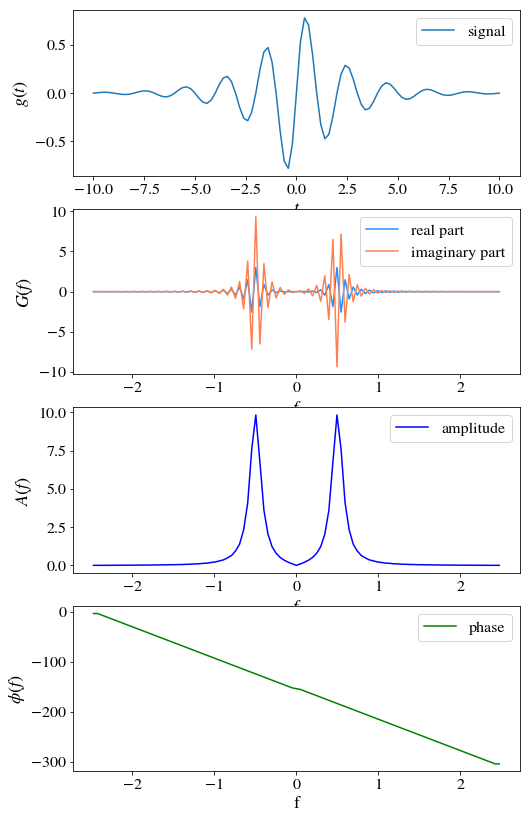

In [21]:
fig = plt.figure(1, figsize=(8,14), frameon=False)
ax1 = fig.add_subplot(411)
ax1.plot(t, g, label='signal')
ax1.legend()
ax1.set_xlabel('$t$')
ax1.set_ylabel('$g(t)$')
ax2 = fig.add_subplot(412)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('$f$')
ax2.set_ylabel('$G(f)$')
ax3 = fig.add_subplot(413)
ax3.plot(f, A, color='blue', label='amplitude')
ax3.legend()
ax3.set_xlabel('$f$')
ax3.set_ylabel('$A(f)$')
ax3 = fig.add_subplot(414)
ax3.plot(f, phase_unwrap, color='green', label='phase')
ax3.legend()
ax3.set_xlabel('f')
ax3.set_ylabel('$\phi(f)$')
plt.show()

### Example 5: Three frequencies with noise

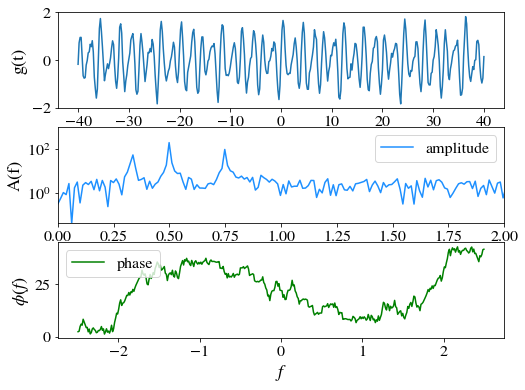

In [22]:
width = 2.0
freq = 0.5
t = np.linspace(-40, 40, 401) # linearly space time array 
g = np.sin(2.0*np.pi*freq*t) + 0.5*np.sin(2.0*np.pi*1.5*freq*t)+ 0.3*np.sin(2.0*np.pi*freq/1.5*t)
for i in range(0,401): # add noise
    g[i] += 0.02*random.randint(-10,10)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2)
phase = np.angle(G)
phase_unwrap = np.unwrap(phase)
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(311)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(312)
ax2.plot(f, A, color='dodgerblue', label='amplitude')
ax2.set_yscale("log", nonposy='clip')
ax2.set_xlim(0,2)
ax2.set_ylim(np.max(A)/5000,5*np.max(A))
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('A(f)')
ax3 = fig.add_subplot(313)
#ax3.plot(f, phase, color='green', label='phase')
ax3.plot(f, phase_unwrap, color='g', label='phase')
ax3.legend()
ax3.set_xlabel('$f$')
ax3.set_ylabel('$\phi(f)$')
plt.show()

### Example 6: Three damped sinusoids with small noise

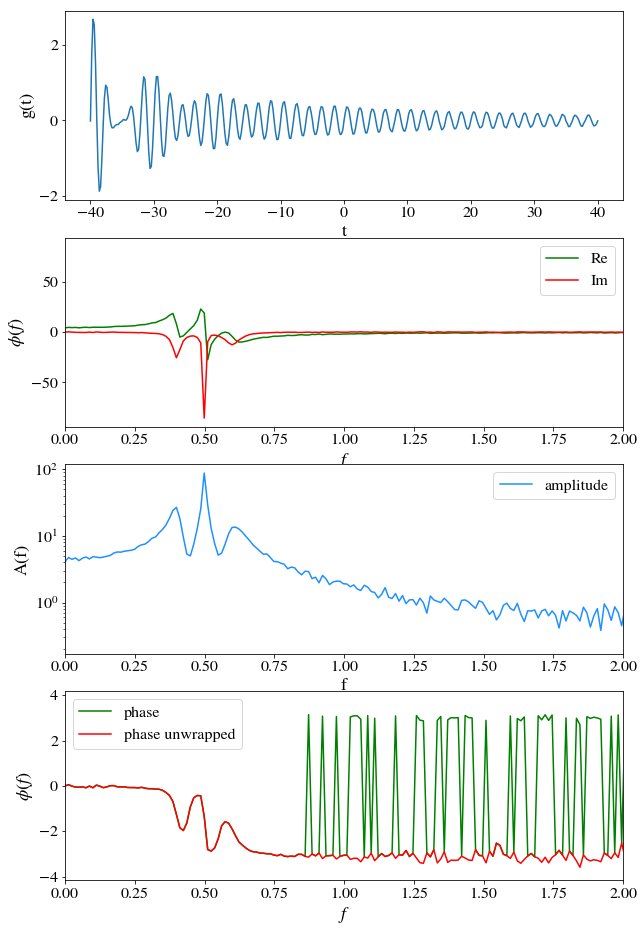

In [23]:
width = 2.0
freq = 0.5
t = np.linspace(-40, 40, 401) # linearly space time array 
g = np.sin(2.0*np.pi*freq*t)*np.exp(-(t+40)/40) + 1.0*np.sin(2.0*np.pi*0.8*freq*t)*np.exp(-(t+40)/10) + 1.0*np.sin(2.0*np.pi*1.2*freq*t)*np.exp(-(t+40)/5) 
for i in range(0,401): # add noise
    g[i] += 0.002*random.randint(-10,10)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2)
phase = np.angle(G)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,16), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')

ax2 = fig.add_subplot(412)
ax2.plot(f, np.real(G), color='green', label='Re')
ax2.plot(f, np.imag(G), color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel('$f$')
ax2.set_ylabel('$\phi(f)$')

ax3 = fig.add_subplot(413)
ax3.plot(f, A, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel('f')
ax3.set_ylabel('A(f)')

ax4 = fig.add_subplot(414)
ax4.plot(f, phase, color='green', label='phase')
ax4.plot(f, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel('$f$')
ax4.set_ylabel('$\phi(f)$')
plt.show()

### Example 7: Three damped sinusoids with large noise

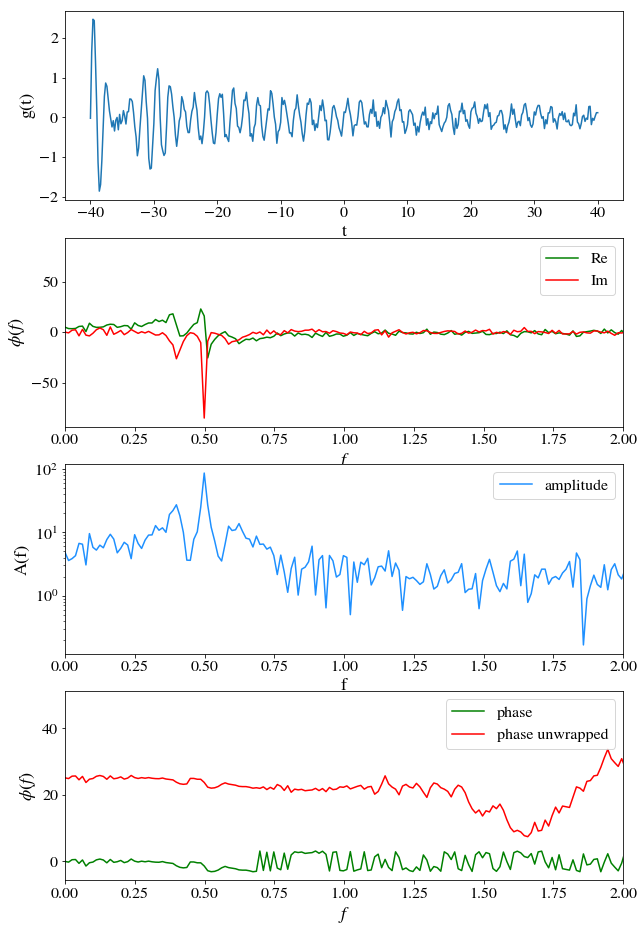

In [24]:
width = 2.0
freq = 0.5
t = np.linspace(-40, 40, 401) # linearly space time array 
g = np.sin(2.0*np.pi*freq*t)*np.exp(-(t+40)/40) + 1.0*np.sin(2.0*np.pi*0.8*freq*t)*np.exp(-(t+40)/10) + 1.0*np.sin(2.0*np.pi*1.2*freq*t)*np.exp(-(t+40)/5) 
for i in range(0,401): # add noise
    g[i] += 0.02*random.randint(-10,10)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max 
G = fftpack.fftshift(G) # shift G order to coorespond to f
A = np.sqrt(np.real(G)**2+np.imag(G)**2)
phase = np.angle(G)
phase_unwrap = np.unwrap(phase)

fig = plt.figure(1, figsize=(10,16), frameon=False)

ax1 = fig.add_subplot(411)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')

ax2 = fig.add_subplot(412)
ax2.plot(f, np.real(G), color='green', label='Re')
ax2.plot(f, np.imag(G), color='red', label='Im')
ax2.legend()
ax2.set_xlim(0,2)
ax2.set_xlabel('$f$')
ax2.set_ylabel('$\phi(f)$')

ax3 = fig.add_subplot(413)
ax3.plot(f, A, color='dodgerblue', label='amplitude')
ax3.set_yscale("log", nonposy='clip')
ax3.set_xlim(0,2)
ax3.legend()
ax3.set_xlabel('f')
ax3.set_ylabel('A(f)')

ax4 = fig.add_subplot(414)
ax4.plot(f, phase, color='green', label='phase')
ax4.plot(f, phase_unwrap, color='red', label='phase unwrapped')
ax4.legend()
ax4.set_xlim(0,2)
ax4.set_xlabel('$f$')
ax4.set_ylabel('$\phi(f)$')
plt.show()